# Preview

## 전처리 대상 데이터

- aws_cloud(구름)
- aws_icsr_ss(일사/일조)
- aws_lwt_tg(초상온도)
    - <사용불가>
- aws_prsr(기압)
- aws_rhm(상대습도)
- aws_rn(강수)
- aws_ta(기온)
- aws_ts(지면온도)
    - <사용불가>
- aws_wind(바람)

## 최종 데이터
**저장형태**: `aws_0000_save.csv`
- aws_cloud(구름)
- aws_icsr_ss(일사/일조)
- aws_prsr(기압)
    - 일부 관측지점 데이터(637)만 선택
- aws_rhm(상대습도)
    - 일부 관측지점 데이터(637 제외)만 선택
- aws_rn(강수)
- aws_ta(기온)
- aws_wind(바람)

## 활용 함수

### drop_cols : 컬럼 정리에 활용

In [29]:
def drop_cols(data):
    drop_cols = data.columns[data.columns.str.contains('qcflg|crob|yn|dtnb')]
    data = data.drop(columns=drop_cols)
    data = data.drop(columns=['Unnamed: 0', 'orgn_stn_id'])
    return data

### sort_by : 날짜별, stn_id별 정렬

In [30]:
def sort_by(data, colname = ['tma', 'stn_id']):
    data = data.sort_values(by=colname)
    data = data.reset_index()
    del data['index']
    
    return data

### multi_distplot : 결측치 & 이상치 확인에 활용

In [31]:
def multi_distplot(data):
    
    col_n = data.shape[1] - 2
    plt.figure(figsize=(15,20))

    for i in range(col_n):
        plt.subplot(6, 4, i+1)
        sns.distplot(data.iloc[:,i+2], kde=False)

# aws_cloud

## 데이터 확인

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
cloud = pd.read_csv('../../data/12.rawdata_weather/aws_cloud.csv')
cloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         139818 non-null  int64  
 1   tma                139818 non-null  object 
 2   stn_id             139818 non-null  int64  
 3   avg_tca            84257 non-null   float64
 4   avg_tca_qcflg      0 non-null       float64
 5   avg_tca_crob       0 non-null       float64
 6   avg_tca_calc_dtnb  139818 non-null  int64  
 7   avg_tca_srv_yn     0 non-null       float64
 8   orgn_stn_id        0 non-null       float64
dtypes: float64(5), int64(3), object(1)
memory usage: 9.6+ MB


In [34]:
cloud.head()

,Unnamed: 0,tma,stn_id,avg_tca,avg_tca_qcflg,avg_tca_crob,avg_tca_calc_dtnb,avg_tca_srv_yn,orgn_stn_id
0,1,2016-04-01 20:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
1,2,2016-04-02 14:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
2,3,2016-04-03 08:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
3,4,2016-04-04 00:00:00.0,616,0.0,NaN,NaN,70,NaN,NaN
4,5,2016-04-04 23:00:00.0,515,0.0,NaN,NaN,70,NaN,NaN


In [35]:
cloud.isnull().sum()

Unnamed: 0                0
tma                       0
stn_id                    0
avg_tca               55561
avg_tca_qcflg        139818
avg_tca_crob         139818
avg_tca_calc_dtnb         0
avg_tca_srv_yn       139818
orgn_stn_id          139818
dtype: int64

## 컬럼 정리

In [36]:
cloud = drop_cols(cloud)

In [37]:
cloud.head()

,tma,stn_id,avg_tca
0,2016-04-01 20:00:00.0,637,0.0
1,2016-04-02 14:00:00.0,637,0.0
2,2016-04-03 08:00:00.0,637,0.0
3,2016-04-04 00:00:00.0,616,0.0
4,2016-04-04 23:00:00.0,515,0.0


## 데이터타입 정리

In [38]:
cloud['tma'] = pd.to_datetime(cloud['tma'])
cloud.dtypes

tma        datetime64[ns]
stn_id              int64
avg_tca           float64
dtype: object

## 정렬

In [39]:
cloud = sort_by(cloud)
cloud.head()

,tma,stn_id,avg_tca
0,2016-04-01 00:00:00,515,0.0
1,2016-04-01 00:00:00,616,NaN
2,2016-04-01 00:00:00,634,0.0
3,2016-04-01 00:00:00,637,0.0
4,2016-04-01 01:00:00,515,0.0


## 결측치 & 이상치 처리

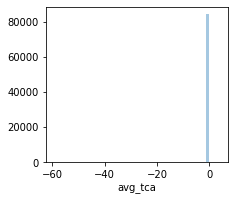

In [40]:
multi_distplot(cloud)

In [41]:
cloud.avg_tca.value_counts().sort_values()

 2.6         1
 2.4         1
 2.8         1
-59.4        1
 3.1         1
 3.2         1
 2.9         1
 3.3         1
 2.2         1
 3.8         2
 2.1         3
 1.6         4
 1.8         4
 0.9         5
 0.8         5
 0.4         5
 2.3         5
 2.0         5
 1.9         6
 0.5         6
 1.2         6
 1.0         6
 1.7         7
 1.3         7
 1.5         8
 1.4        11
 1.1        13
 0.7        14
 0.3        14
 0.6        17
 0.1        17
 0.2        22
 0.0     84056
Name: avg_tca, dtype: int64

-59.4 이상치: avg_tca(평균 전운량) 컬럼의 평균으로 대체

In [42]:
cloud.avg_tca.mean()

0.0016995620541913428

In [43]:
cloud.loc[cloud.avg_tca==-59.4, 'avg_tca'] = cloud.avg_tca.mean()

In [44]:
cloud.avg_tca.value_counts().sort_values()

3.2000        1
0.0017        1
3.3000        1
2.9000        1
2.6000        1
2.8000        1
2.2000        1
2.4000        1
3.1000        1
3.8000        2
2.1000        3
1.6000        4
1.8000        4
0.4000        5
2.0000        5
2.3000        5
0.9000        5
0.8000        5
0.5000        6
1.9000        6
1.0000        6
1.2000        6
1.7000        7
1.3000        7
1.5000        8
1.4000       11
1.1000       13
0.7000       14
0.3000       14
0.1000       17
0.6000       17
0.2000       22
0.0000    84056
Name: avg_tca, dtype: int64

In [45]:
cloud.isnull().sum()

tma            0
stn_id         0
avg_tca    55561
dtype: int64

In [46]:
cloud = cloud.fillna(0)
cloud.isnull().sum()

tma        0
stn_id     0
avg_tca    0
dtype: int64

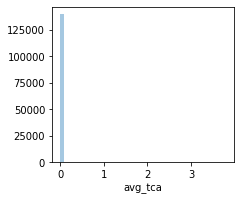

In [47]:
multi_distplot(cloud)

In [48]:
cloud.to_csv('../../data/22.savedata_weather/aws_cloud_save.csv', index=False, encoding='utf-8')

# aws_icsr_ss
## 데이터 확인

In [65]:
icsr = pd.read_csv('../../data/12.rawdata_weather/aws_icsr_ss.csv')
icsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           139818 non-null  int64  
 1   tma                  139818 non-null  object 
 2   stn_id               139818 non-null  int64  
 3   sum_ss_hr            62332 non-null   float64
 4   sum_ss_hr_qcflg      68422 non-null   float64
 5   sum_ss_hr_crob       0 non-null       float64
 6   ssrate               0 non-null       float64
 7   sum_gsr              62333 non-null   float64
 8   sum_ss_hr_calp_dtnb  139818 non-null  int64  
 9   orgn_stn_id          0 non-null       float64
 10  sum_ss_hr_srv_yn     0 non-null       float64
dtypes: float64(7), int64(3), object(1)
memory usage: 11.7+ MB


## 컬럼 정리

In [66]:
icsr = drop_cols(icsr)

In [67]:
icsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tma        139818 non-null  object 
 1   stn_id     139818 non-null  int64  
 2   sum_ss_hr  62332 non-null   float64
 3   ssrate     0 non-null       float64
 4   sum_gsr    62333 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.3+ MB


In [68]:
icsr = icsr.drop(columns='ssrate')
icsr.isnull().sum()

tma              0
stn_id           0
sum_ss_hr    77486
sum_gsr      77485
dtype: int64

## 데이터타입 정리

In [69]:
icsr['tma'] = pd.to_datetime(icsr['tma'])
icsr.dtypes

tma          datetime64[ns]
stn_id                int64
sum_ss_hr           float64
sum_gsr             float64
dtype: object

## 정렬

In [70]:
icsr.head()

,tma,stn_id,sum_ss_hr,sum_gsr
0,2016-04-01 20:00:00,634,0.0,0.0
1,2016-04-02 09:00:00,634,0.0,0.0
2,2016-04-02 20:00:00,515,0.0,0.0
3,2016-04-07 07:00:00,637,0.0,0.0
4,2016-04-07 11:00:00,616,0.0,0.0


In [71]:
icsr = sort_by(icsr)
icsr.head()

,tma,stn_id,sum_ss_hr,sum_gsr
0,2016-04-01 00:00:00,515,0.0,0.0
1,2016-04-01 00:00:00,616,0.0,0.0
2,2016-04-01 00:00:00,634,0.0,0.0
3,2016-04-01 00:00:00,637,0.0,0.0
4,2016-04-01 01:00:00,515,0.0,0.0


## 결측치 & 이상치 처리

In [72]:
icsr.isnull().sum()

tma              0
stn_id           0
sum_ss_hr    77486
sum_gsr      77485
dtype: int64

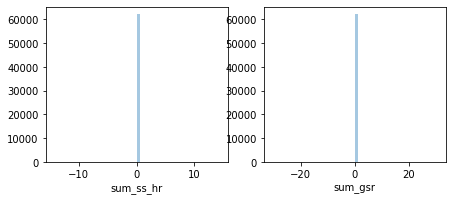

In [73]:
multi_distplot(icsr)

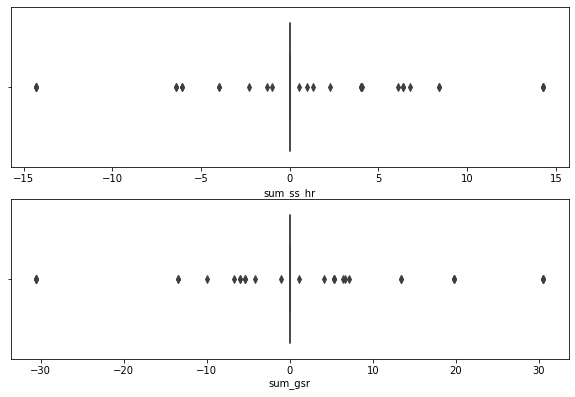

In [74]:
plt.figure(figsize=(10,10))

for i in range(2):
    plt.subplot(3, 1, i+1)
    sns.boxplot(icsr.iloc[:,i+2])

In [75]:
icsr.sum_ss_hr.value_counts()

 0.0     62301
 14.3        4
-14.3        4
 4.0         3
 8.4         2
-4.0         2
 6.4         2
-6.4         2
-6.1         2
 1.0         1
-2.3         1
 0.5         1
 6.8         1
 6.1         1
 4.1         1
-1.0         1
-1.3         1
 1.3         1
 2.3         1
Name: sum_ss_hr, dtype: int64

In [76]:
icsr['sum_ss_hr'] = icsr.sum_ss_hr.fillna(0)
icsr.isnull().sum()

tma              0
stn_id           0
sum_ss_hr        0
sum_gsr      77485
dtype: int64

In [77]:
icsr.sum_gsr.value_counts()

 0.00     62302
-30.56        4
 30.56        4
 5.37         3
 19.84        3
-5.37         2
-6.00         2
-13.42        2
 13.42        2
-1.10         1
-6.71         1
 7.16         1
 6.71         1
 1.10         1
 6.40         1
 4.17         1
-9.99         1
-4.17         1
Name: sum_gsr, dtype: int64

In [78]:
icsr['sum_gsr'] = icsr.sum_gsr.fillna(0)
icsr.isnull().sum()

tma          0
stn_id       0
sum_ss_hr    0
sum_gsr      0
dtype: int64

In [79]:
icsr.to_csv('../../data/22.savedata_weather/aws_icsr_ss_save.csv', encoding='utf-8', index=False)

# aws_lwt_tg <사용불가>

## 데이터 확인

In [80]:
lwt = pd.read_csv('../../data/12.rawdata_weather/aws_lwt_tg.csv')
lwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            139818 non-null  int64  
 1   tma                   139818 non-null  object 
 2   stn_id                139818 non-null  int64  
 3   avg_min_tg            0 non-null       float64
 4   min_tg                0 non-null       float64
 5   min_tg_hrmt           0 non-null       float64
 6   min_tg_crob           0 non-null       float64
 7   min_tg_qcflg          0 non-null       float64
 8   avg_min_tg_qcflg      0 non-null       float64
 9   avg_min_tg_crob       0 non-null       float64
 10  avg_min_tg_calc_dtnb  139818 non-null  int64  
 11  min_tg_calp_dtnb      139818 non-null  int64  
 12  avg_min_tg_srv_yn     0 non-null       float64
 13  min_tg_srv_yn         0 non-null       float64
 14  orgn_stn_id           0 non-null       float64
dtype

## 컬럼 정리

In [81]:
lwt = drop_cols(lwt)
lwt.isnull().sum()

tma                 0
stn_id              0
avg_min_tg     139818
min_tg         139818
min_tg_hrmt    139818
dtype: int64

# aws_prsr
## 데이터 확인

In [92]:
prsr = pd.read_csv('../../data/12.rawdata_weather/aws_prsr.csv')
prsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        139818 non-null  int64  
 1   tma               139818 non-null  object 
 2   stn_id            139818 non-null  int64  
 3   avg_pa            35124 non-null   float64
 4   avg_pa_qcflg      90034 non-null   float64
 5   avg_pa_crob       214 non-null     float64
 6   max_pa            35183 non-null   float64
 7   max_pa_qcflg      0 non-null       float64
 8   max_pa_crob       153 non-null     float64
 9   max_pa_hrmt       35336 non-null   float64
 10  min_pa            35183 non-null   float64
 11  min_pa_qcflg      0 non-null       float64
 12  min_pa_crob       153 non-null     float64
 13  min_pa_hrmt       35336 non-null   float64
 14  avg_pa_calc_dtnb  139816 non-null  float64
 15  avg_ps            35124 non-null   float64
 16  avg_ps_qcflg      90

## 컬럼 정리

In [93]:
prsr = drop_cols(prsr)
prsr.isnull().sum()

tma                 0
stn_id              0
avg_pa         104694
max_pa         104635
max_pa_hrmt    104482
min_pa         104635
min_pa_hrmt    104482
avg_ps         104694
max_ps         104635
max_ps_hrmt    104482
min_ps         104635
min_ps_hrmt    104482
rtm_pa         104580
rtm_ps         104580
rtm_pa_hrmt    104580
rtm_ps_hrmt    104580
dtype: int64

In [94]:
prsr = prsr.drop(columns=['rtm_pa', 'rtm_ps', 'rtm_pa_hrmt', 'rtm_ps_hrmt'])
prsr.isnull().sum()

tma                 0
stn_id              0
avg_pa         104694
max_pa         104635
max_pa_hrmt    104482
min_pa         104635
min_pa_hrmt    104482
avg_ps         104694
max_ps         104635
max_ps_hrmt    104482
min_ps         104635
min_ps_hrmt    104482
dtype: int64

## 데이터타입 정리

In [95]:
prsr['tma'] = pd.to_datetime(prsr['tma'])
prsr.dtypes

tma            datetime64[ns]
stn_id                  int64
avg_pa                float64
max_pa                float64
max_pa_hrmt           float64
min_pa                float64
min_pa_hrmt           float64
avg_ps                float64
max_ps                float64
max_ps_hrmt           float64
min_ps                float64
min_ps_hrmt           float64
dtype: object

## 정렬

In [96]:
prsr = sort_by(prsr)
prsr.head()

,tma,stn_id,avg_pa,max_pa,max_pa_hrmt,min_pa,min_pa_hrmt,avg_ps,max_ps,max_ps_hrmt,min_ps,min_ps_hrmt
0,2016-04-01 00:00:00,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-01 00:00:00,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-04-01 00:00:00,634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-04-01 00:00:00,637,1013.3,1013.5,2301.0,1013.0,2358.0,1016.0,1016.2,2301.0,1015.7,2358.0
4,2016-04-01 01:00:00,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 결측치 & 이상치 처리

In [97]:
prsr.shape

(139818, 12)

In [98]:
prsr.isnull().mean()

tma            0.000000
stn_id         0.000000
avg_pa         0.748788
max_pa         0.748366
max_pa_hrmt    0.747271
min_pa         0.748366
min_pa_hrmt    0.747271
avg_ps         0.748788
max_ps         0.748366
max_ps_hrmt    0.747271
min_ps         0.748366
min_ps_hrmt    0.747271
dtype: float64

결측치가 75%가량. 지점별로 차이가 있는지 확인

In [99]:
prsr.groupby(by='stn_id').count()

,tma,avg_pa,max_pa,max_pa_hrmt,min_pa,min_pa_hrmt,avg_ps,max_ps,max_ps_hrmt,min_ps,min_ps_hrmt
stn_id,,,,,,,,,,,
515,35017,75,93,177,93,177,75,93,177,93,177
616,34907,55,98,117,98,117,55,98,117,98,117
634,34896,35,35,45,35,45,35,35,45,35,45
637,34998,34959,34957,34997,34957,34997,34959,34957,34997,34957,34997


637번 관측소(신평 AWS)만 가져오기

In [100]:
prsr_637 = prsr[prsr['stn_id']==637].copy()
prsr_637.isnull().sum()

tma             0
stn_id          0
avg_pa         39
max_pa         41
max_pa_hrmt     1
min_pa         41
min_pa_hrmt     1
avg_ps         39
max_ps         41
max_ps_hrmt     1
min_ps         41
min_ps_hrmt     1
dtype: int64

In [101]:
prsr_637.shape

(34998, 12)

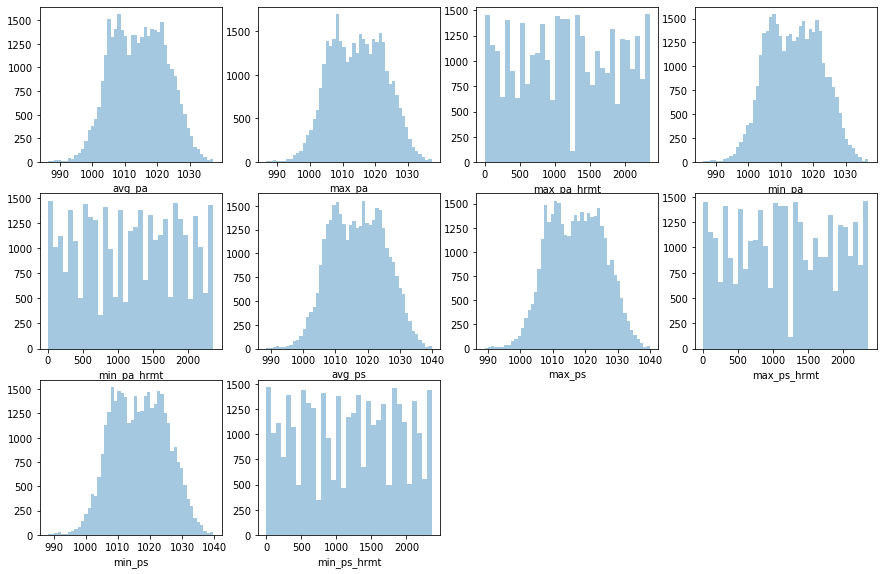

In [102]:
multi_distplot(prsr_637)

In [103]:
for i in range(10):
    prsr_637.iloc[:,i+2] = prsr_637.iloc[:,i+2].fillna(method='ffill')
prsr_637.isnull().sum()

tma            0
stn_id         0
avg_pa         0
max_pa         0
max_pa_hrmt    0
min_pa         0
min_pa_hrmt    0
avg_ps         0
max_ps         0
max_ps_hrmt    0
min_ps         0
min_ps_hrmt    0
dtype: int64

In [104]:
prsr_637.head()

,tma,stn_id,avg_pa,max_pa,max_pa_hrmt,min_pa,min_pa_hrmt,avg_ps,max_ps,max_ps_hrmt,min_ps,min_ps_hrmt
3,2016-04-01 00:00:00,637,1013.3,1013.5,2301.0,1013.0,2358.0,1016.0,1016.2,2301.0,1015.7,2358.0
7,2016-04-01 01:00:00,637,1012.8,1013.0,1.0,1012.6,40.0,1015.5,1015.7,1.0,1015.3,40.0
11,2016-04-01 02:00:00,637,1012.5,1012.6,101.0,1012.2,155.0,1015.2,1015.3,101.0,1014.9,155.0
15,2016-04-01 03:00:00,637,1012.2,1012.3,203.0,1012.1,217.0,1014.9,1015.0,203.0,1014.8,217.0
19,2016-04-01 04:00:00,637,1012.3,1012.4,343.0,1012.2,301.0,1015.0,1015.1,343.0,1014.9,301.0


In [105]:
prsr_637.to_csv('../../data/22.savedata_weather/aws_prsr_637_save.csv', encoding='utf-8', index=False)

# aws_rhm

## 데이터 확인

In [158]:
rhm = pd.read_csv('../../data/12.rawdata_weather/aws_rhm.csv')
rhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         139818 non-null  int64  
 1   tma                139818 non-null  object 
 2   stn_id             139818 non-null  int64  
 3   avg_rhm            114337 non-null  float64
 4   avg_rhm_qcflg      31753 non-null   float64
 5   avg_rhm_crob       145 non-null     float64
 6   min_rhm            114322 non-null  float64
 7   min_rhm_qcflg      0 non-null       float64
 8   min_rhm_crob       145 non-null     float64
 9   min_rhm_hrmt       114467 non-null  float64
 10  avg_rhm_calc_dtnb  139816 non-null  float64
 11  rtm_rhm            114419 non-null  float64
 12  rtm_rhm_qcflg      0 non-null       float64
 13  rtm_rhm_crob       0 non-null       float64
 14  rtm_rhm_hrmt       114419 non-null  float64
 15  max_rhm            114322 non-null  float64
 16  ma

## 컬럼 정리

In [159]:
rhm = drop_cols(rhm)
rhm.isnull().sum()

tma                 0
stn_id              0
avg_rhm         25481
min_rhm         25496
min_rhm_hrmt    25351
rtm_rhm         25399
rtm_rhm_hrmt    25399
max_rhm         25496
max_rhm_hrmt    25351
dtype: int64

In [160]:
rhm = rhm.drop(columns=['rtm_rhm', 'rtm_rhm_hrmt'])
rhm.isnull().sum()

tma                 0
stn_id              0
avg_rhm         25481
min_rhm         25496
min_rhm_hrmt    25351
max_rhm         25496
max_rhm_hrmt    25351
dtype: int64

## 데이터타입 정리

In [161]:
rhm['tma'] = pd.to_datetime(rhm['tma'])
rhm.dtypes

tma             datetime64[ns]
stn_id                   int64
avg_rhm                float64
min_rhm                float64
min_rhm_hrmt           float64
max_rhm                float64
max_rhm_hrmt           float64
dtype: object

## 정렬

In [162]:
rhm = sort_by(rhm)
rhm.head()

,tma,stn_id,avg_rhm,min_rhm,min_rhm_hrmt,max_rhm,max_rhm_hrmt
0,2016-04-01 00:00:00,515,54.9,46.2,2324.0,62.4,2355.0
1,2016-04-01 00:00:00,616,42.4,37.9,2309.0,47.4,2339.0
2,2016-04-01 00:00:00,634,44.2,39.5,2338.0,50.3,0.0
3,2016-04-01 00:00:00,637,NaN,NaN,NaN,NaN,NaN
4,2016-04-01 01:00:00,515,61.3,54.2,4.0,65.5,57.0


## 결측치 & 이상치 처리

In [163]:
rhm.isnull().mean()

tma             0.000000
stn_id          0.000000
avg_rhm         0.182244
min_rhm         0.182351
min_rhm_hrmt    0.181314
max_rhm         0.182351
max_rhm_hrmt    0.181314
dtype: float64

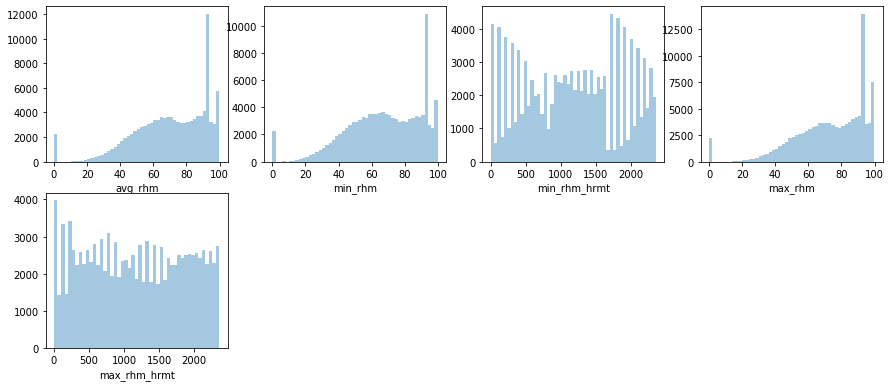

In [164]:
multi_distplot(rhm)

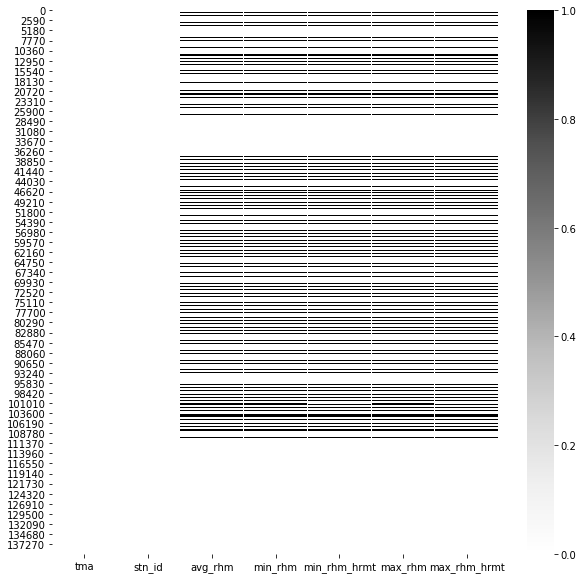

In [165]:
plt.figure(figsize=(10,10))
sns.heatmap(rhm.isnull(), cmap="Greys")

In [166]:
rhm.groupby(by='stn_id').count()

,tma,avg_rhm,min_rhm,min_rhm_hrmt,max_rhm,max_rhm_hrmt
stn_id,,,,,,
515,35017,34991,34990,35016,34990,35016
616,34907,34855,34848,34907,34848,34907
634,34896,34849,34846,34894,34846,34894
637,34998,9642,9638,9650,9638,9650


637 지점에서 결측치가 많이 발생함

In [167]:
rhm_637 = rhm[rhm['stn_id']==637].copy()

In [168]:
rhm_637.isnull().mean()

tma             0.000000
stn_id          0.000000
avg_rhm         0.724499
min_rhm         0.724613
min_rhm_hrmt    0.724270
max_rhm         0.724613
max_rhm_hrmt    0.724270
dtype: float64

637 지점의 결측치가 70% 이상이므로 637 데이터 제외하기

In [169]:
rhm_no637 = rhm[rhm['stn_id']!=637].copy()
rhm_no637.head()

,tma,stn_id,avg_rhm,min_rhm,min_rhm_hrmt,max_rhm,max_rhm_hrmt
0,2016-04-01 00:00:00,515,54.9,46.2,2324.0,62.4,2355.0
1,2016-04-01 00:00:00,616,42.4,37.9,2309.0,47.4,2339.0
2,2016-04-01 00:00:00,634,44.2,39.5,2338.0,50.3,0.0
4,2016-04-01 01:00:00,515,61.3,54.2,4.0,65.5,57.0
5,2016-04-01 01:00:00,616,42.9,39.4,32.0,47.4,42.0


In [170]:
rhm_no637.isnull().mean()

tma             0.000000
stn_id          0.000000
avg_rhm         0.001193
min_rhm         0.001297
min_rhm_hrmt    0.000029
max_rhm         0.001297
max_rhm_hrmt    0.000029
dtype: float64

In [171]:
rhm_no637 = rhm_no637.fillna(method='ffill')
rhm_no637.isnull().sum()

tma             0
stn_id          0
avg_rhm         0
min_rhm         0
min_rhm_hrmt    0
max_rhm         0
max_rhm_hrmt    0
dtype: int64

In [172]:
rhm_no637.to_csv('../../data/22.savedata_weather/aws_rhm_no637_save.csv', encoding='utf-8', index=False)

# aws_rn

## 데이터 확인

In [125]:
rain = pd.read_csv('../../data/12.rawdata_weather/aws_rn.csv')
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139820 entries, 0 to 139819
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               139820 non-null  int64  
 1   tma                      139820 non-null  object 
 2   stn_id                   139820 non-null  int64  
 3   sum_rn                   139769 non-null  float64
 4   sum_rn_qcflg             1827 non-null    float64
 5   sum_rn_crob              0 non-null       float64
 6   sum_rn_calp_dtnb         139816 non-null  float64
 7   sum_rn_hrmt              139807 non-null  float64
 8   mi1_rn_en_cnt            139820 non-null  int64  
 9   mi1_rn_en_cnt_qcflg      0 non-null       float64
 10  mi1_rn_en_cnt_crob       0 non-null       float64
 11  mi1_rn_en_cnt_calc_dtnb  139820 non-null  int64  
 12  hr1_rn                   139154 non-null  float64
 13  hr1_rn_qcflg             0 non-null       float64
 14  hr1_

## 컬럼 정리

In [126]:
rain = drop_cols(rain)
rain.isnull().mean()

tma                  0.000000
stn_id               0.000000
sum_rn               0.000365
sum_rn_hrmt          0.000093
mi1_rn_en_cnt        0.000000
hr1_rn               0.004763
hr1_rn_hrmt          0.000000
mi10_max_rn          0.004713
mi10_max_rn_hrmt     0.000029
mi15_max_rn          0.004692
mi15_max_rn_hrmt     0.000086
hr1_max_rn           0.004463
hr1_max_rn_hrmt      0.000086
mm0_1_hr1_rn         0.609419
mm0_1_hr1_rn_hrmt    0.000029
dtype: float64

In [127]:
rain = rain.drop(columns=['mm0_1_hr1_rn', 'mm0_1_hr1_rn_hrmt'])
rain.isnull().sum()

tma                   0
stn_id                0
sum_rn               51
sum_rn_hrmt          13
mi1_rn_en_cnt         0
hr1_rn              666
hr1_rn_hrmt           0
mi10_max_rn         659
mi10_max_rn_hrmt      4
mi15_max_rn         656
mi15_max_rn_hrmt     12
hr1_max_rn          624
hr1_max_rn_hrmt      12
dtype: int64

## 데이터타입 정리

In [128]:
rain['tma'] = pd.to_datetime(rain['tma'])
rain.dtypes

tma                 datetime64[ns]
stn_id                       int64
sum_rn                     float64
sum_rn_hrmt                float64
mi1_rn_en_cnt                int64
hr1_rn                     float64
hr1_rn_hrmt                  int64
mi10_max_rn                float64
mi10_max_rn_hrmt           float64
mi15_max_rn                float64
mi15_max_rn_hrmt           float64
hr1_max_rn                 float64
hr1_max_rn_hrmt            float64
dtype: object

## 정렬

In [129]:
rain = sort_by(rain)
rain.head()

,tma,stn_id,sum_rn,sum_rn_hrmt,mi1_rn_en_cnt,hr1_rn,hr1_rn_hrmt,mi10_max_rn,mi10_max_rn_hrmt,mi15_max_rn,mi15_max_rn_hrmt,hr1_max_rn,hr1_max_rn_hrmt
0,2016-04-01 00:00:00,515,0.0,0.0,0,0.0,0,0.0,2301.0,0.0,2301.0,0.0,2301.0
1,2016-04-01 00:00:00,616,0.0,0.0,0,0.0,0,0.0,2301.0,0.0,2301.0,0.0,2301.0
2,2016-04-01 00:00:00,634,0.0,0.0,0,0.0,0,0.0,2301.0,0.0,2301.0,0.0,2301.0
3,2016-04-01 00:00:00,637,0.0,0.0,0,0.0,0,0.0,2301.0,0.0,2301.0,0.0,2301.0
4,2016-04-01 01:00:00,515,0.0,100.0,0,0.0,100,0.0,1.0,0.0,1.0,0.0,1.0


## 결측치 & 이상치 처리

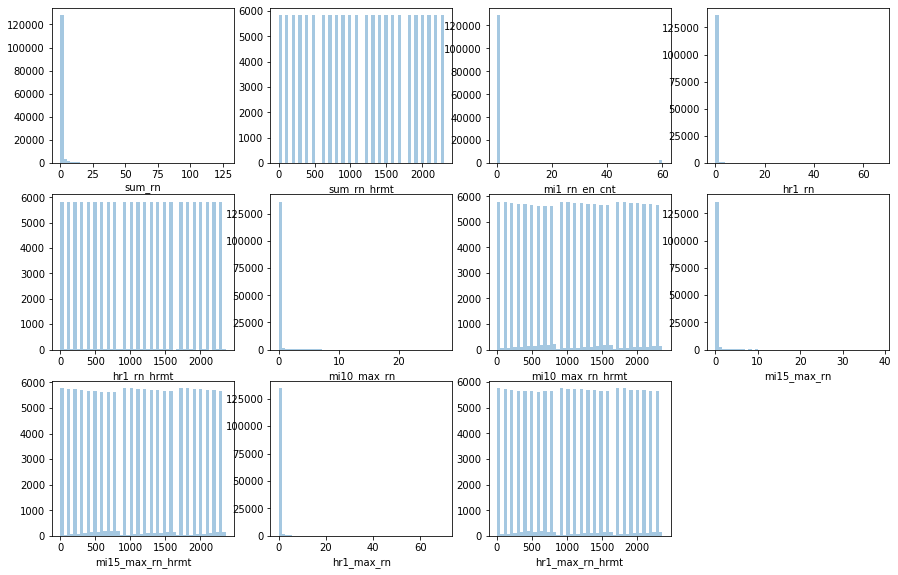

In [130]:
multi_distplot(rain)

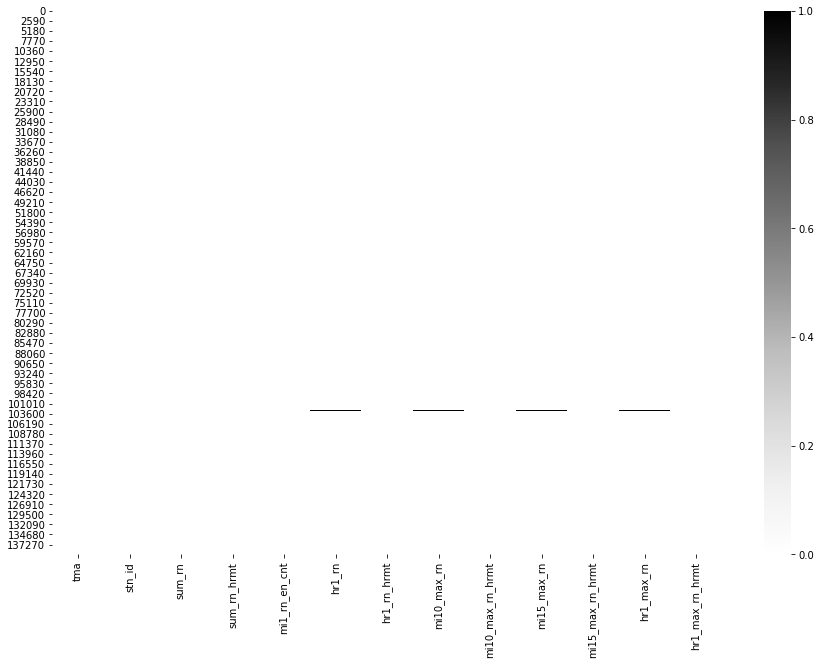

In [131]:
plt.figure(figsize=(15, 10))

sns.heatmap(rain.isnull(), cmap='Greys')

In [132]:
rain.groupby(by='stn_id').count()

,tma,sum_rn,sum_rn_hrmt,mi1_rn_en_cnt,hr1_rn,hr1_rn_hrmt,mi10_max_rn,mi10_max_rn_hrmt,mi15_max_rn,mi15_max_rn_hrmt,hr1_max_rn,hr1_max_rn_hrmt
stn_id,,,,,,,,,,,,
515,35016,35002,35016,35016,34695,35016,34697,35016,34699,35016,34716,35016
616,34911,34898,34898,34911,34799,34911,34801,34907,34801,34899,34805,34899
634,34896,34872,34896,34896,34790,34896,34791,34896,34791,34896,34796,34896
637,34997,34997,34997,34997,34870,34997,34872,34997,34873,34997,34879,34997


In [133]:
rain = rain.fillna(method='ffill')
rain.isnull().sum()

tma                 0
stn_id              0
sum_rn              0
sum_rn_hrmt         0
mi1_rn_en_cnt       0
hr1_rn              0
hr1_rn_hrmt         0
mi10_max_rn         0
mi10_max_rn_hrmt    0
mi15_max_rn         0
mi15_max_rn_hrmt    0
hr1_max_rn          0
hr1_max_rn_hrmt     0
dtype: int64

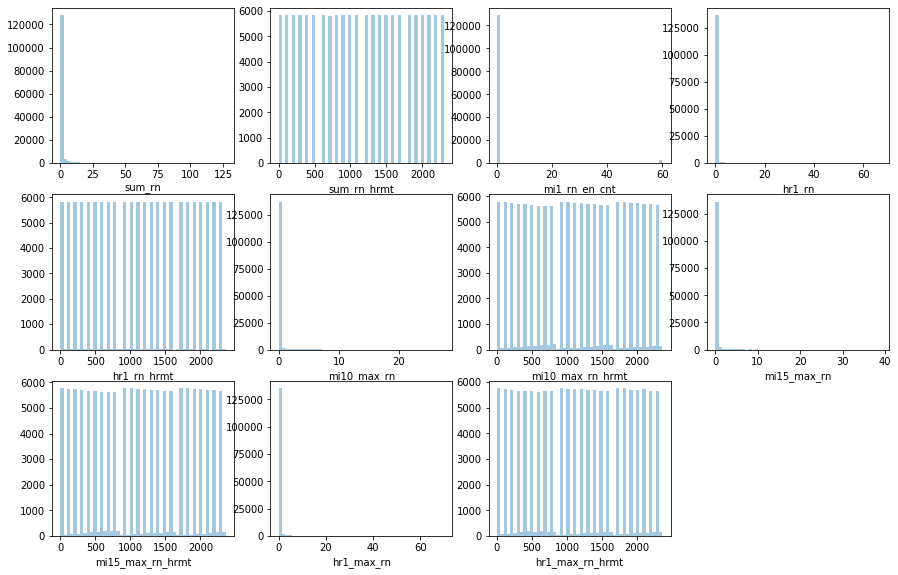

In [134]:
multi_distplot(rain)

In [135]:
rain.to_csv('../../data/22.savedata_weather/aws_rn_save.csv', encoding='utf-8', index=False)

# aws_ta
## 데이터 확인

In [136]:
tem = pd.read_csv('../../data/12.rawdata_weather/aws_ta.csv')
tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        139818 non-null  int64  
 1   tma               139818 non-null  object 
 2   stn_id            139818 non-null  int64  
 3   avg_ta            139560 non-null  float64
 4   avg_ta_qcflg      12896 non-null   float64
 5   avg_ta_crob       187 non-null     float64
 6   avg_ta_calc_dtnb  139816 non-null  float64
 7   max_ta            139560 non-null  float64
 8   max_ta_qcflg      0 non-null       float64
 9   max_ta_crob       187 non-null     float64
 10  max_ta_hrmt       139747 non-null  float64
 11  min_ta            139560 non-null  float64
 12  min_ta_qcflg      0 non-null       float64
 13  min_ta_crob       187 non-null     float64
 14  min_ta_hrmt       139747 non-null  float64
 15  ta_calp_dtnb      139816 non-null  float64
 16  rtm_ta            13

## 컬럼 정리

In [137]:
tem = drop_cols(tem)
tem.isnull().sum()

tma              0
stn_id           0
avg_ta         258
max_ta         258
max_ta_hrmt     71
min_ta         258
min_ta_hrmt     71
rtm_ta         137
rtm_ta_hrmt    137
dtype: int64

In [138]:
tem = tem.drop(columns=['rtm_ta', 'rtm_ta_hrmt'])
tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tma          139818 non-null  object 
 1   stn_id       139818 non-null  int64  
 2   avg_ta       139560 non-null  float64
 3   max_ta       139560 non-null  float64
 4   max_ta_hrmt  139747 non-null  float64
 5   min_ta       139560 non-null  float64
 6   min_ta_hrmt  139747 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.5+ MB


## 데이터타입 정리

In [139]:
tem['tma'] = pd.to_datetime(tem['tma'])
tem.dtypes

tma            datetime64[ns]
stn_id                  int64
avg_ta                float64
max_ta                float64
max_ta_hrmt           float64
min_ta                float64
min_ta_hrmt           float64
dtype: object

## 정렬

In [140]:
tem = sort_by(tem)
tem.head()

,tma,stn_id,avg_ta,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt
0,2016-04-01 00:00:00,515,8.0,8.9,2328.0,7.3,2354.0
1,2016-04-01 00:00:00,616,7.2,7.8,2303.0,6.6,2337.0
2,2016-04-01 00:00:00,634,8.7,9.1,2326.0,8.2,0.0
3,2016-04-01 00:00:00,637,7.1,8.1,2309.0,6.4,2323.0
4,2016-04-01 01:00:00,515,6.6,7.7,3.0,5.8,54.0


## 결측치 & 이상치 처리

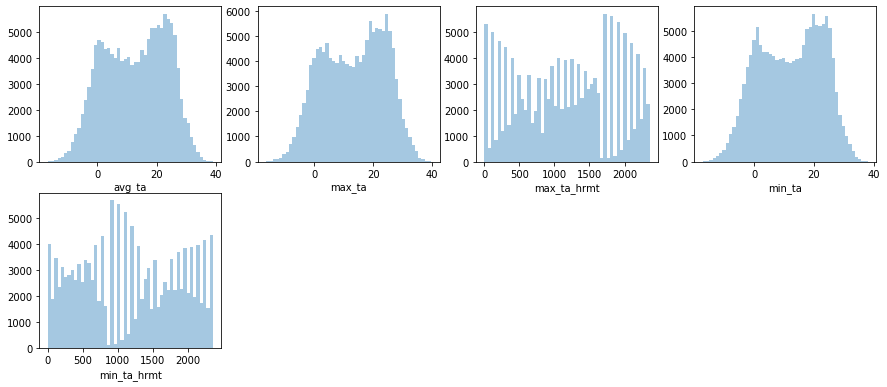

In [141]:
multi_distplot(tem)

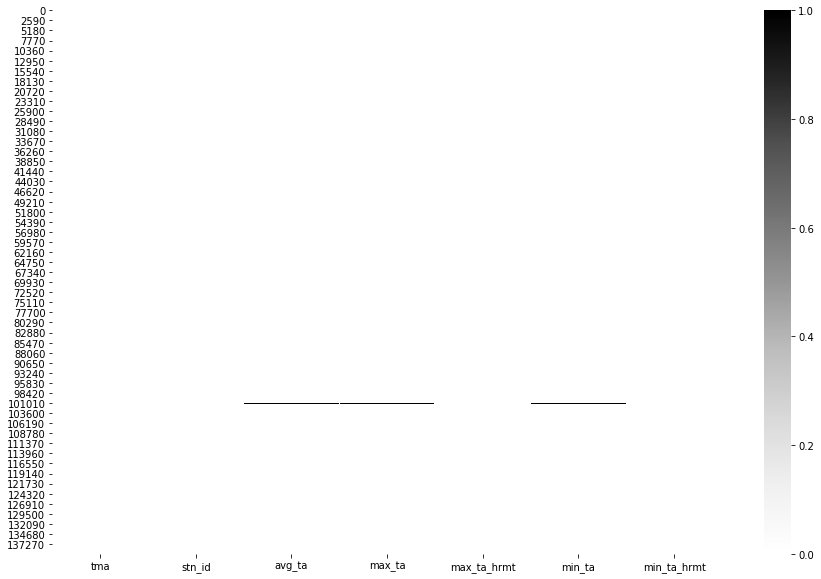

In [142]:
plt.figure(figsize=(15,10))
sns.heatmap(tem.isnull(), cmap='Greys')

In [143]:
tem.groupby(by='stn_id').count()

,tma,avg_ta,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt
stn_id,,,,,,
515,35017,34990,34990,35016,34990,35016
616,34907,34800,34800,34871,34800,34871
634,34896,34846,34846,34894,34846,34894
637,34998,34924,34924,34966,34924,34966


In [144]:
tem = tem.fillna(method='ffill')
tem.isnull().sum()

tma            0
stn_id         0
avg_ta         0
max_ta         0
max_ta_hrmt    0
min_ta         0
min_ta_hrmt    0
dtype: int64

In [145]:
tem.to_csv('../../data/22.savedata_weather/aws_ta_save.csv', encoding='utf-8', index=False)

# aws_ts <사용불가>

## 데이터 확인

In [146]:
ts = pd.read_csv('../../data/12.rawdata_weather/aws_ts.csv')
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        139818 non-null  int64  
 1   tma               139818 non-null  object 
 2   stn_id            139818 non-null  int64  
 3   avg_ts            0 non-null       float64
 4   max_ts            0 non-null       float64
 5   max_ts_hrmt       0 non-null       float64
 6   min_ts            0 non-null       float64
 7   min_ts_hrmt       0 non-null       float64
 8   avg_ts_calc_dtnb  139818 non-null  int64  
 9   avg_ts_qcflg      0 non-null       float64
 10  avg_ts_crob       0 non-null       float64
 11  max_ts_qcflg      0 non-null       float64
 12  max_ts_crob       0 non-null       float64
 13  min_ts_qcflg      0 non-null       float64
 14  min_ts_crob       0 non-null       float64
 15  avg_ts_srv_yn     0 non-null       float64
 16  max_ts_srv_yn     0 

## 컬럼 정리

In [147]:
ts = drop_cols(ts)
ts.isnull().mean()

tma            0.0
stn_id         0.0
avg_ts         1.0
max_ts         1.0
max_ts_hrmt    1.0
min_ts         1.0
min_ts_hrmt    1.0
dtype: float64

# aws_wind

## 데이터 확인

In [148]:
wind = pd.read_csv('../../data/12.rawdata_weather/aws_wind.csv')
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 61 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              139818 non-null  int64  
 1   tma                     139818 non-null  object 
 2   stn_id                  139818 non-null  int64  
 3   avg_ws                  139326 non-null  float64
 4   avg_ws_qcflg            13262 non-null   float64
 5   avg_ws_crob             0 non-null       float64
 6   mix_ws                  139610 non-null  float64
 7   mix_ws_qcflg            0 non-null       float64
 8   mix_ws_crob             0 non-null       float64
 9   mix_wd                  139610 non-null  float64
 10  mix_wd_qcflg            0 non-null       float64
 11  mix_wd_crob             0 non-null       float64
 12  max_ws                  139326 non-null  float64
 13  max_ws_qcflg            0 non-null       float64
 14  max_ws_crob         

## 컬럼 정리

In [149]:
wind = drop_cols(wind)
wind.isnull().mean()

tma                     0.000000
stn_id                  0.000000
avg_ws                  0.003519
mix_ws                  0.001488
mix_wd                  0.001488
max_ws                  0.003519
max_ws_hrmt             0.003519
max_wd                  0.002503
max_ws_wd               0.003755
avg_mi1_ws              0.002582
max_mi1_ws              0.002582
max_mi1_ws_hrmt         0.002582
max_mi1_ws_wd           0.002761
max_ins_ws              0.002582
max_ins_ws_hrmt         0.002582
max_ins_ws_wd           0.002761
rtm_mi10_avg_ws         0.002282
rtm_mi10_avg_wd         0.002460
rtm_mi10_avg_ws_hrmt    0.001688
dtype: float64

In [150]:
wind = wind.drop(columns=['rtm_mi10_avg_ws', 'rtm_mi10_avg_wd', 'rtm_mi10_avg_ws_hrmt'])
wind.isnull().sum()

tma                  0
stn_id               0
avg_ws             492
mix_ws             208
mix_wd             208
max_ws             492
max_ws_hrmt        492
max_wd             350
max_ws_wd          525
avg_mi1_ws         361
max_mi1_ws         361
max_mi1_ws_hrmt    361
max_mi1_ws_wd      386
max_ins_ws         361
max_ins_ws_hrmt    361
max_ins_ws_wd      386
dtype: int64

## 데이터타입 정리

In [151]:
wind['tma'] = pd.to_datetime(wind['tma'])
wind.dtypes

tma                datetime64[ns]
stn_id                      int64
avg_ws                    float64
mix_ws                    float64
mix_wd                    float64
max_ws                    float64
max_ws_hrmt               float64
max_wd                    float64
max_ws_wd                 float64
avg_mi1_ws                float64
max_mi1_ws                float64
max_mi1_ws_hrmt           float64
max_mi1_ws_wd             float64
max_ins_ws                float64
max_ins_ws_hrmt           float64
max_ins_ws_wd             float64
dtype: object

## 정렬

In [152]:
wind = sort_by(wind)
wind.head()

,tma,stn_id,avg_ws,mix_ws,mix_wd,max_ws,max_ws_hrmt,max_wd,max_ws_wd,avg_mi1_ws,max_mi1_ws,max_mi1_ws_hrmt,max_mi1_ws_wd,max_ins_ws,max_ins_ws_hrmt,max_ins_ws_wd
0,2016-04-01 00:00:00,515,0.5,0.5,99.3,0.9,2328.0,90.0,94.0,0.6,1.1,2322.0,84.2,1.4,2322.0,98.4
1,2016-04-01 00:00:00,616,0.3,0.3,166.0,0.7,2333.0,157.5,152.3,0.3,1.0,2330.0,141.4,1.1,2330.0,137.8
2,2016-04-01 00:00:00,634,0.4,0.3,127.3,1.1,2309.0,112.5,119.6,0.3,1.2,2305.0,115.4,1.2,2304.0,120.9
3,2016-04-01 00:00:00,637,0.7,0.6,210.6,0.9,2303.0,225.0,147.3,0.7,1.1,0.0,216.9,1.1,2351.0,213.8
4,2016-04-01 01:00:00,515,0.5,0.2,141.4,0.9,1.0,112.5,110.3,0.4,1.0,12.0,121.4,1.2,13.0,115.3


## 결측치 & 이상치 처리

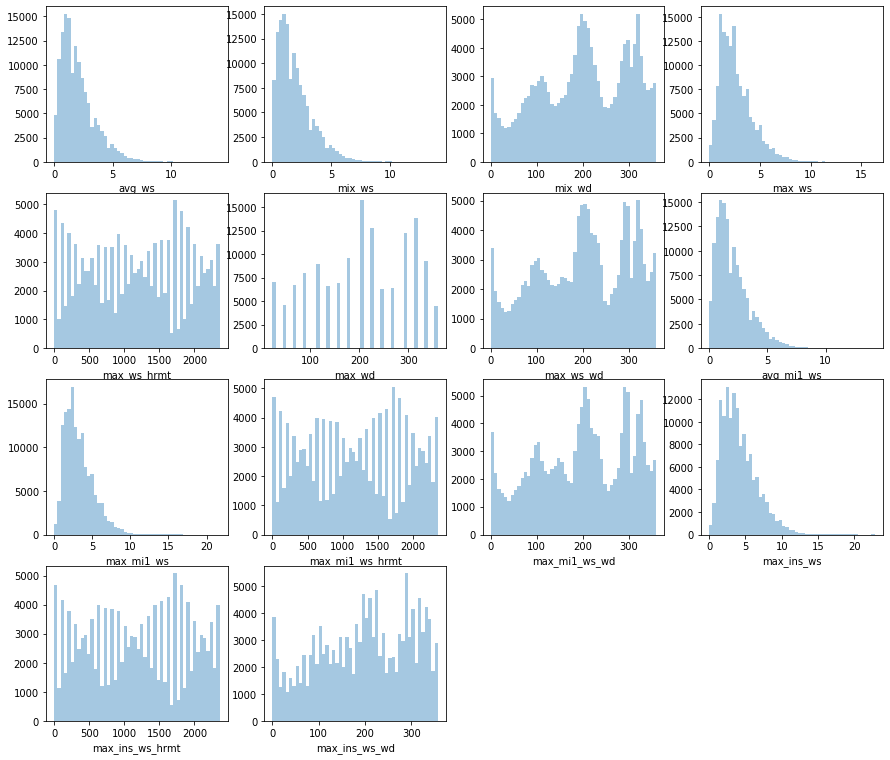

In [153]:
multi_distplot(wind)

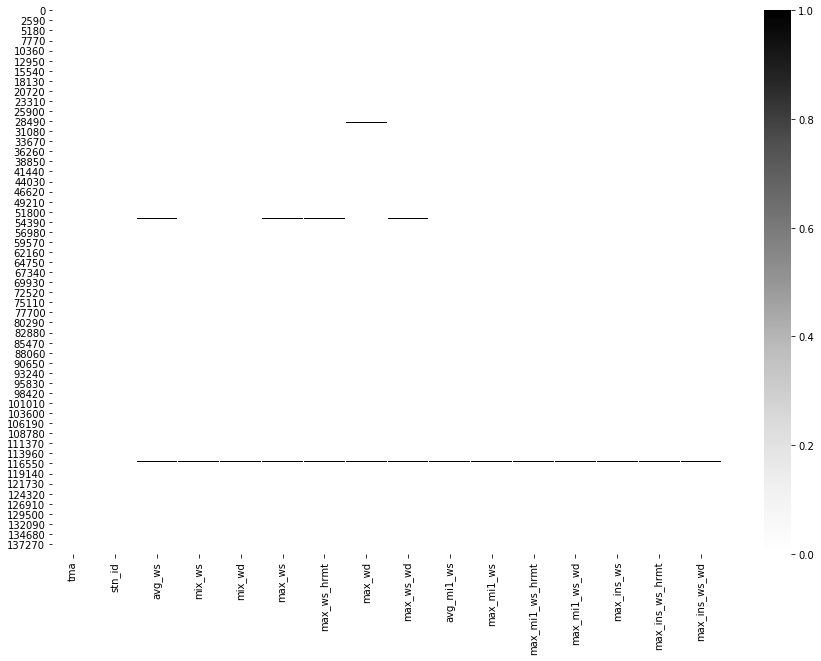

In [154]:
plt.figure(figsize=(15, 10))
sns.heatmap(wind.isnull(), cmap='Greys')

In [155]:
wind.groupby(by='stn_id').count()

,tma,avg_ws,mix_ws,mix_wd,max_ws,max_ws_hrmt,max_wd,max_ws_wd,avg_mi1_ws,max_mi1_ws,max_mi1_ws_hrmt,max_mi1_ws_wd,max_ins_ws,max_ins_ws_hrmt,max_ins_ws_wd
stn_id,,,,,,,,,,,,,,,
515,35017,34958,34992,34992,34958,34958,34947,34925,34990,34990,34990,34965,34990,34990,34965
616,34907,34810,34895,34895,34810,34810,34817,34810,34835,34835,34835,34835,34834,34834,34834
634,34896,34637,34726,34726,34637,34637,34716,34637,34676,34676,34676,34676,34676,34676,34676
637,34998,34921,34997,34997,34921,34921,34988,34921,34956,34956,34956,34956,34957,34957,34957


In [156]:
wind = wind.fillna(method='ffill')
wind.isnull().sum()

tma                0
stn_id             0
avg_ws             0
mix_ws             0
mix_wd             0
max_ws             0
max_ws_hrmt        0
max_wd             0
max_ws_wd          0
avg_mi1_ws         0
max_mi1_ws         0
max_mi1_ws_hrmt    0
max_mi1_ws_wd      0
max_ins_ws         0
max_ins_ws_hrmt    0
max_ins_ws_wd      0
dtype: int64

In [157]:
wind.to_csv('../../data/22.savedata_weather/aws_wind_save.csv', encoding='utf-8', index=False)